# Import packages

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.cluster import KMeans

# Load Iris Dataset

In [2]:
iris=pd.read_csv(r"C:\Users\ravip\Desktop\anaconda\read_csv\Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print (iris.Species)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.drop(['Id'],axis=1,inplace=True)


In [10]:
iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

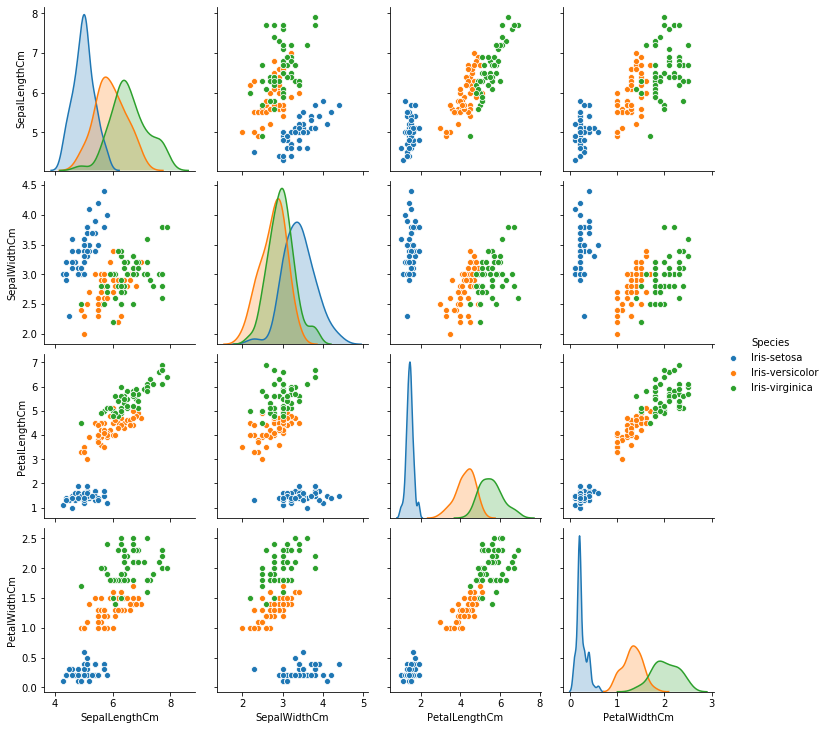

In [11]:
sns.pairplot(data=iris,hue='Species')

# Applying K-Means Clustering

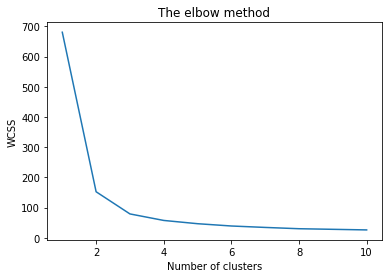

In [12]:
x = iris.iloc[:, 0:4].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Creating K-mean Classifier

In [13]:

#Finding the optimum number of cluster for K-Means Cluster

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# Visualising Clusters

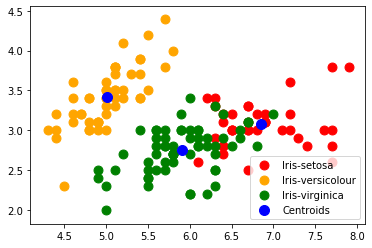

In [14]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')
plt.legend()


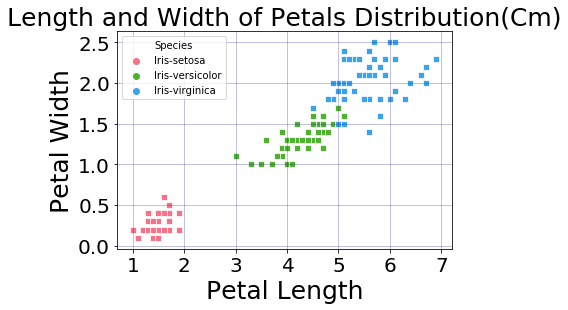

In [17]:
plt.grid(color = 'darkBlue', alpha = 0.3)

sns.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Length and Width of Petals Distribution(Cm)',color='black',size = 25)
plt.xlabel('Petal Length',color='black',size = 25)
plt.ylabel('Petal Width',color='black',size = 25)

plt.show()

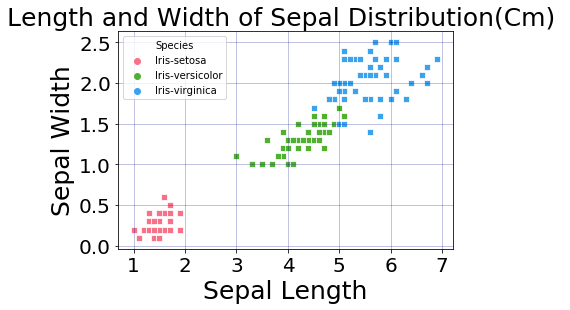

In [18]:
plt.grid(color = 'darkBlue', alpha = 0.3)

sns.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Length and Width of Sepal Distribution(Cm) ',color='black',size = 25)
plt.xlabel('Sepal Length',color='black',size = 25)
plt.ylabel('Sepal Width',color='black',size = 25)

plt.show()

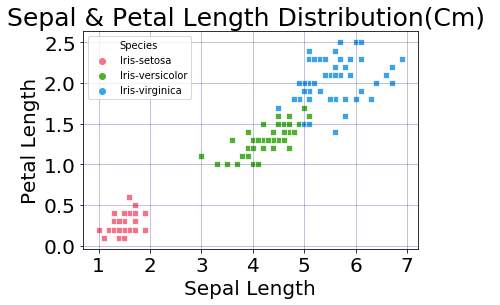

In [19]:
plt.grid(color = 'darkBlue', alpha = 0.3)

sns.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Sepal & Petal Length Distribution(Cm) ',color='black',size = 25)
plt.xlabel('Sepal Length',color='black',size = 20)
plt.ylabel('Petal Length',color='black',size = 20)

plt.show()

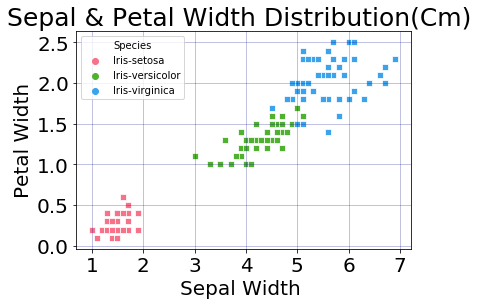

In [20]:
plt.grid(color = 'darkBlue', alpha = 0.3)

sns.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Sepal & Petal Width Distribution(Cm) ',color='black',size = 25)
plt.xlabel('Sepal Width ',color='black',size = 20)
plt.ylabel('Petal Width',color='black',size = 20)

plt.show()